# Convolution and ReLU

__Feature Extraction__

Three different layers used in feature extraction process:
- convolution layer
- ReLU activation 
- maximum pooling layer

Feature extraction performed by the base consists of three basic operations:
- __Filter__ an image for a particular feature (convolution) 
- __Detect__ that feature within the filtered image (ReLu)
- __Condense__ the image to enhance the features (maximum pooling)

In [88]:
from itertools import product

def show_kernel(kernel, label=True, digits=None, text_size=28):
    # Format kernel
    kernel = np.array(kernel)
    if digits is not None:
        kernel = kernel.round(digits)

    # Plot kernel
    cmap = plt.get_cmap('Blues_r')
    plt.imshow(kernel, cmap=cmap)
    rows, cols = kernel.shape
    thresh = (kernel.max()+kernel.min())/2
    # Optionally, add value labels
    if label:
        for i, j in product(range(rows), range(cols)):
            val = kernel[i, j]
            color = cmap(0) if val > thresh else cmap(255)
            plt.text(j, i, val, 
                     color=color, size=text_size,
                     horizontalalignment='center', verticalalignment='center')
    plt.xticks([])
    plt.yticks([])

In [89]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

__Weights__

The weights a convolution network learns during training are contained in its convolutional layers. These weights are called kernels. They can be represented as small arrays:

| -1 | 2 | -1 |
|----|---|----|
| -1 | 2 | -1 |
| -1 | 2 | -1 |

A kernel scans a image and produces a weighted sum of pixel values. In this case, the kernel acts similar to polarized lens, emphasizing and deemphasizing certain patterns of information.

__Activations__

The activations in the network are called feature maps. They are result of filtering an image. They have visual features the kernel extracts.


__Detect with ReLU__

A neuron with a rectifier attached is called a rectified linear unit. 
<p align="center">
  <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fenriquegit.github.io%2Fbehavior-free%2Fimages%2Fnn_relu.png&f=1&nofb=1&ipt=f0a4d522c44535f2417157adbd0692a2373c924ff98efcbdb9e5659362d5a4c4" alt="NN ReLU" width="600"/>
</p>

Which is why it is called __ReLU activation__ or ReLU function.

In [90]:
model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3), # activation is none
    # more layers to follow
])

In [91]:
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image_path = 'data/resources/car_feature.jpg'

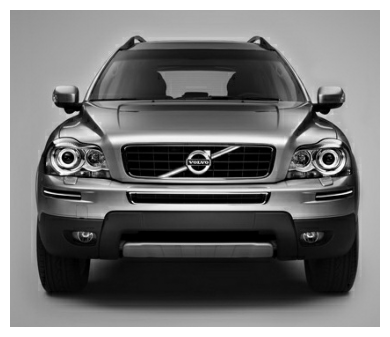

In [92]:
# read the image
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

plt.figure(figsize=(4,4))
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.show()

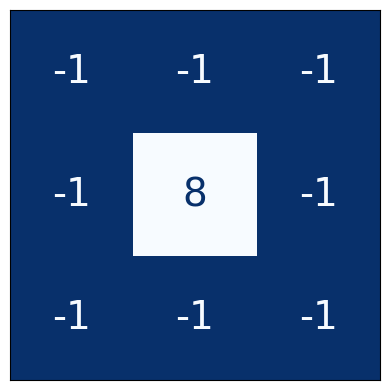

In [93]:
kernel = tf.constant([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
])

plt.figure(figsize=(4,4))
show_kernel(kernel)

In [94]:
# Reformat for batch compatibility.
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

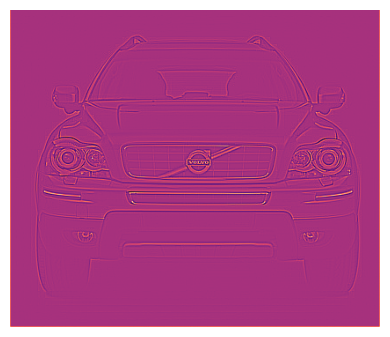

In [95]:
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME'
)

plt.figure(figsize=(4,4))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show()

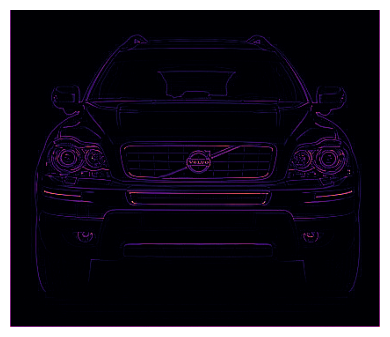

In [96]:
image_detect = tf.nn.relu(image_filter)
plt.figure(figsize=(4, 4))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show();